<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar archivo csv desde seaborn (la base de datos ya está incluida en la librería)
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Axes: xlabel='alcohol', ylabel='total'>

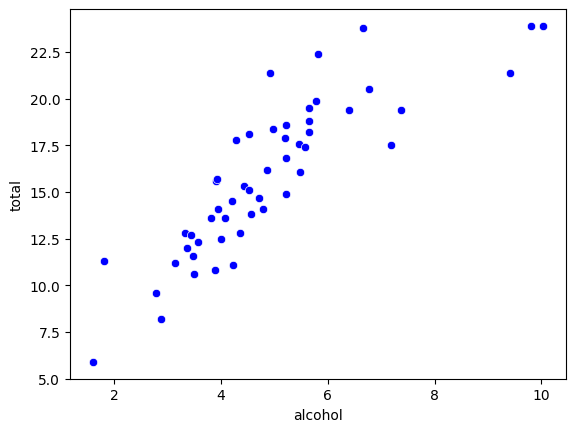

In [4]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['alcohol']] #Tiene doble corchete porque es como si fuera una lista
Var_Dep= df['total']

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [11]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep) #X es una matiz (ya que son varias columnas) por eso esta en mayuscula - variables predictoras
#y es un vector (una columna, una variable) por eso esta en minuscula

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__ 

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': np.float64(5.857776154826299)}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

#R^2 es el coeficiente de determinación, que nos indica qué tan bien se ajusta el modelo a los datos. (entre más se acerque a 1 -GOOD)

0.7269492966665405

In [14]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['alcohol']])
y_pred

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

In [15]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.321112,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,15.054867,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,16.443069,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,17.695093,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.686997,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.597560,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,13.760161,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,15.735757,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,9.095559,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,16.408516,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


<Axes: xlabel='alcohol', ylabel='total'>

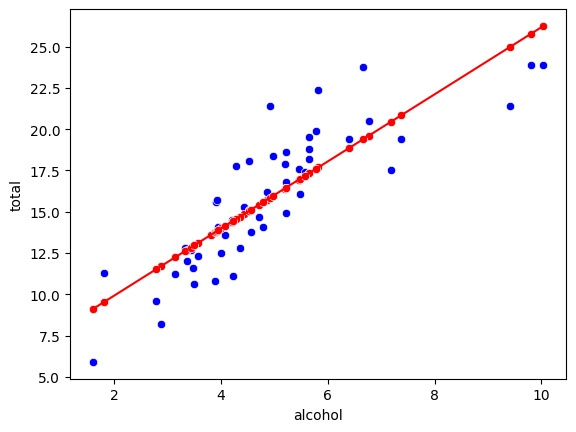

In [16]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [17]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7269492966665405

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

#Eficiencia de nuestro modelo en porcentaje

np.float64(0.8526132163334911)

In [19]:
#Eliminamos la columna tipo string
df= df.drop(['abbrev'], axis=1)

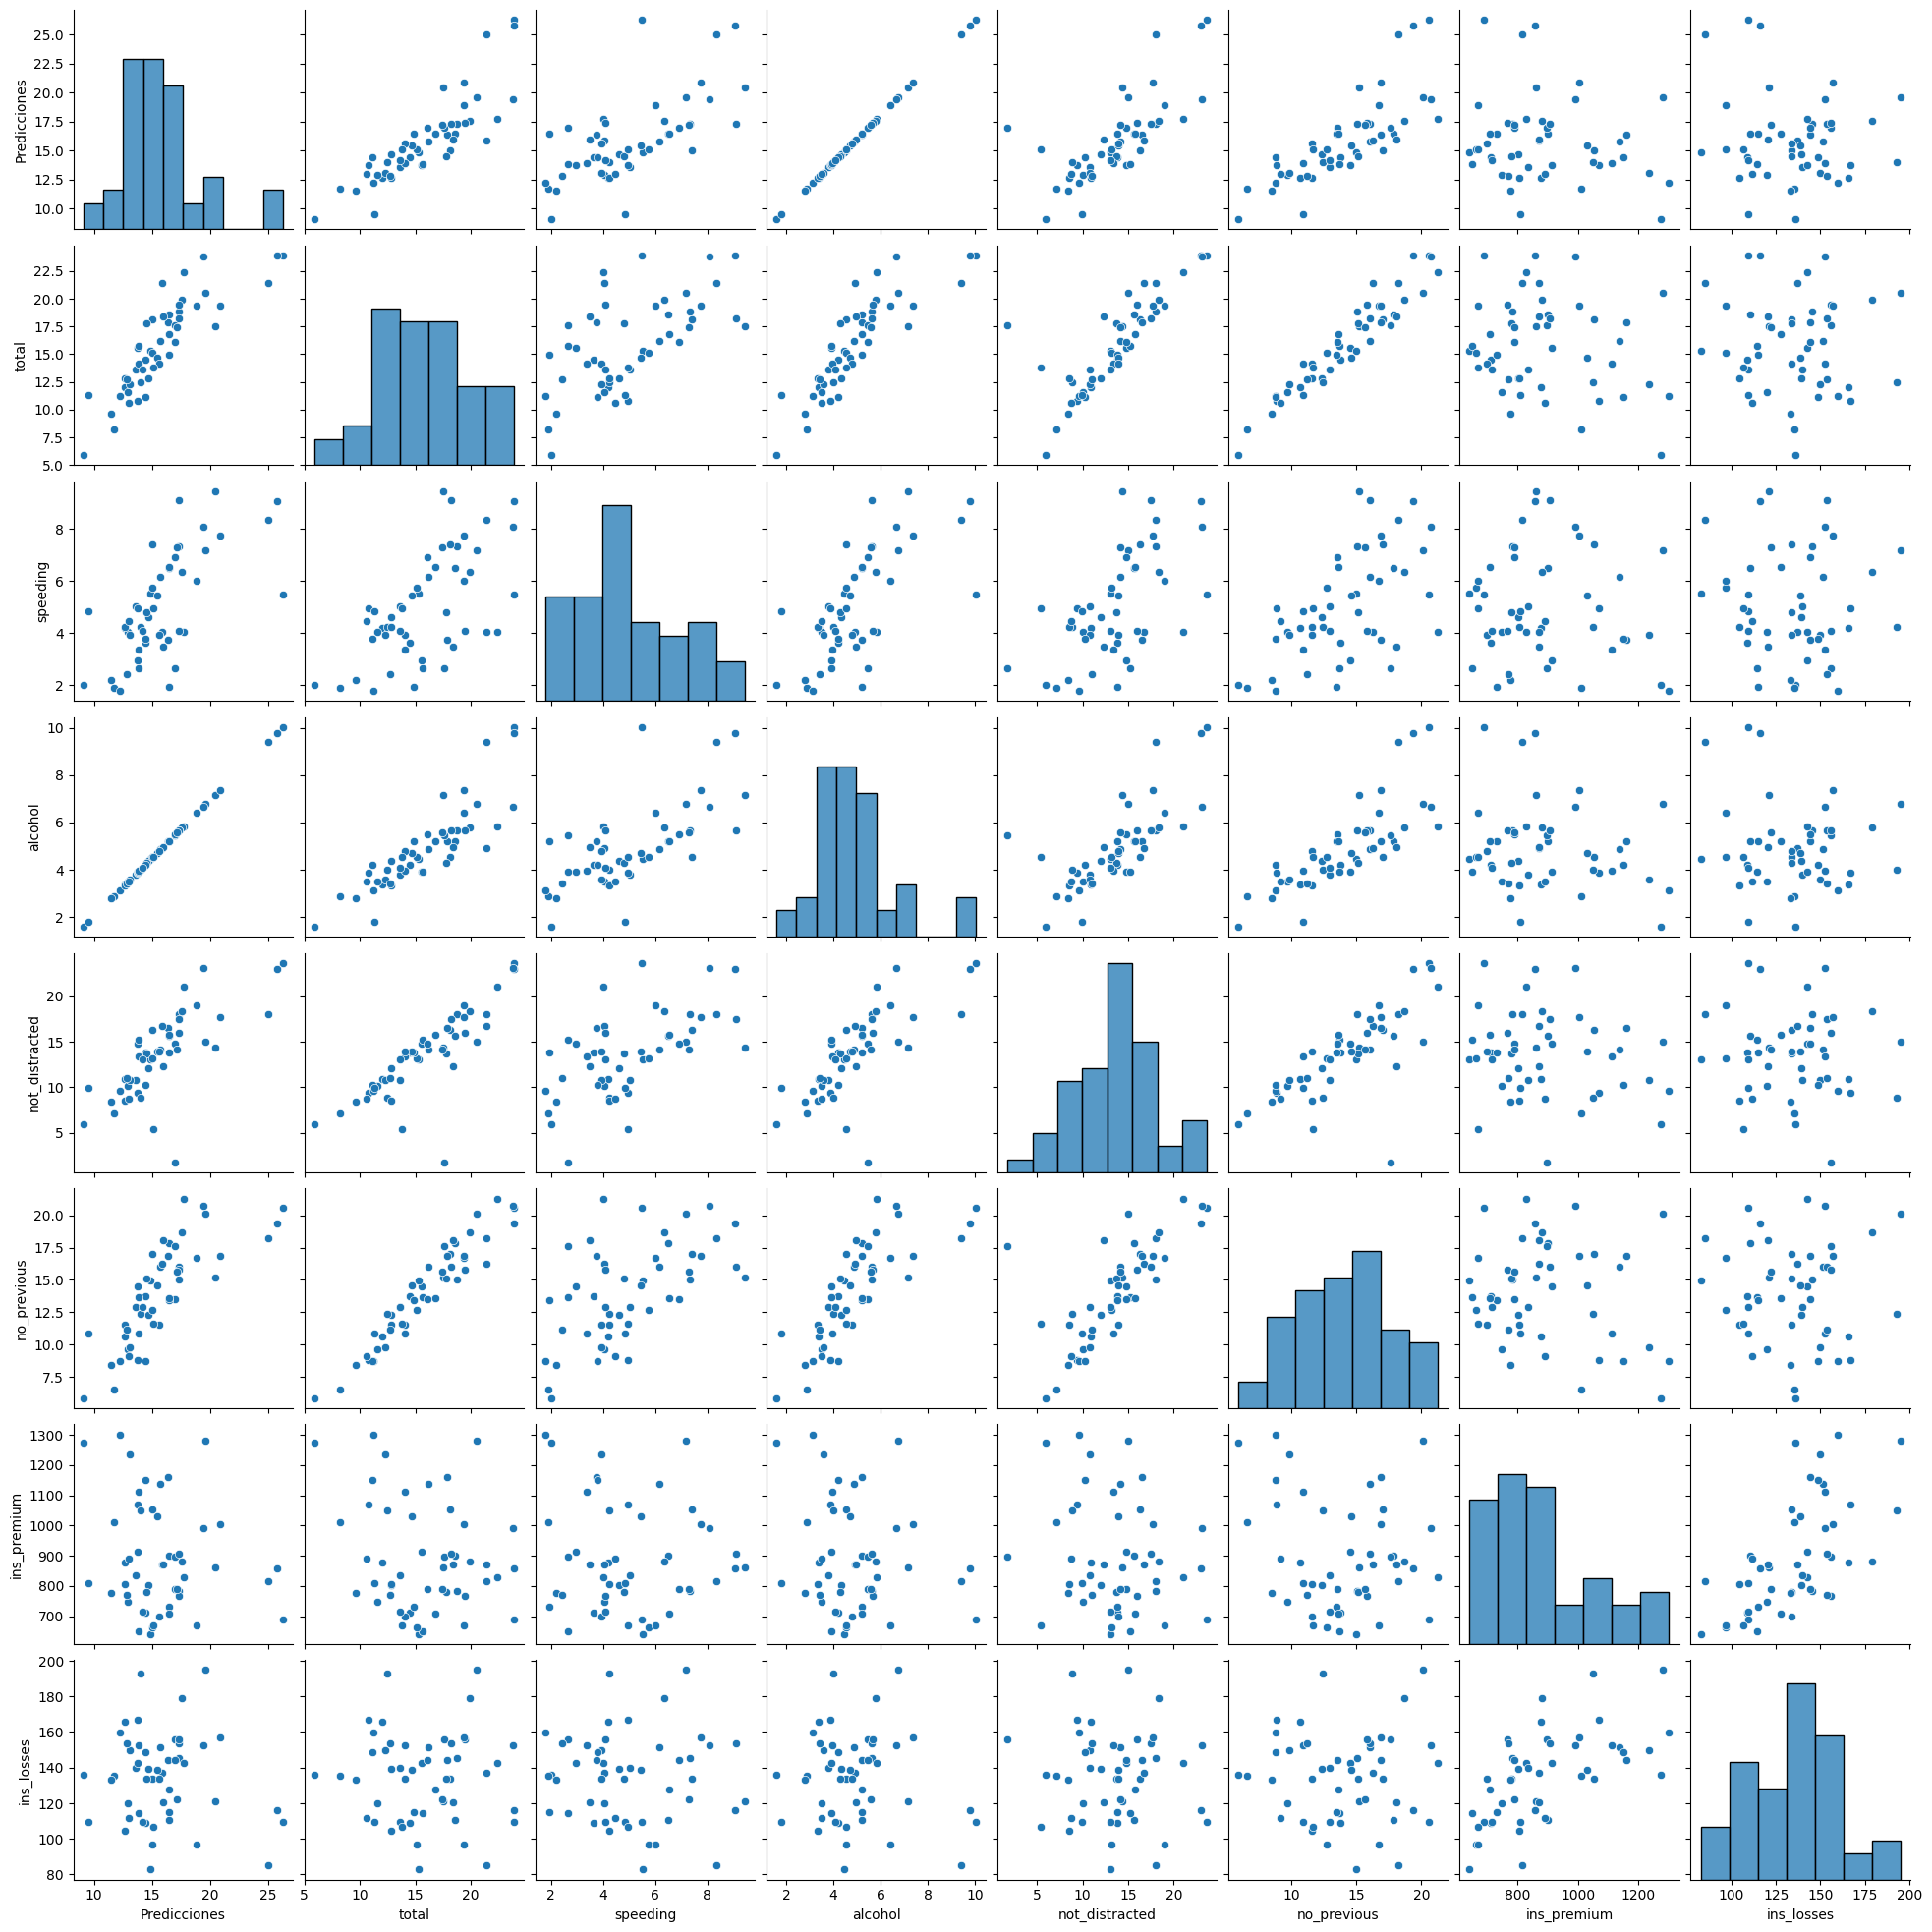

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

#con esta grafica podemos observar vairables multiples

In [ ]:
#Encontramos todas las correlaciones entre las variables (debe de ser el paso uno y elgir las variables más altas)
Corr_Factors=df.corr()
Corr_Factors

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
Predicciones,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
total,0.852613,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.669719,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.732816,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.783520,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.170612,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.112547,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [24]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
Predicciones,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
total,0.852613,1.000000,0.611548,0.852613,0.827560,0.956179,0.199702,0.036011
speeding,0.669719,0.611548,1.000000,0.669719,0.588010,0.571976,0.077675,0.065928
alcohol,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
not_distracted,0.732816,0.827560,0.588010,0.732816,1.000000,0.747307,0.174856,0.075970
no_previous,0.783520,0.956179,0.571976,0.783520,0.747307,1.000000,0.156895,0.006359
ins_premium,0.170612,0.199702,0.077675,0.170612,0.174856,0.156895,1.000000,0.623116
ins_losses,0.112547,0.036011,0.065928,0.112547,0.075970,0.006359,0.623116,1.000000


<Axes: >

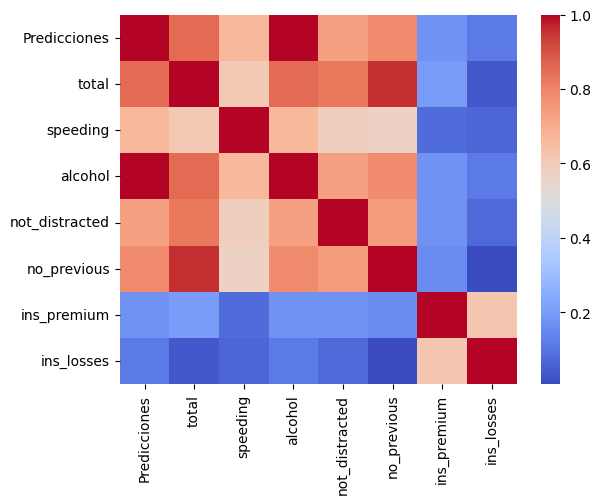

In [26]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

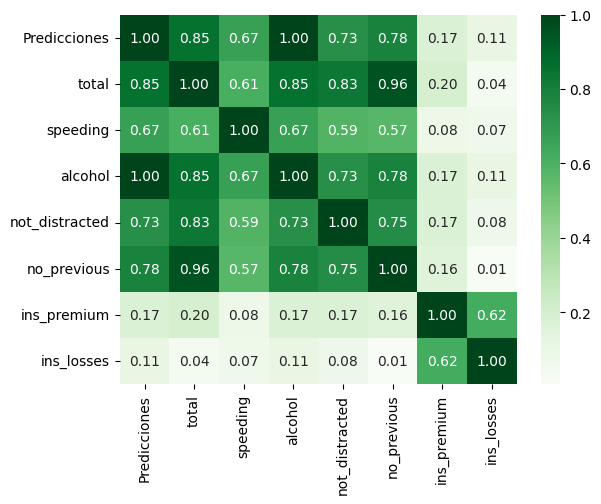

In [27]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Greens', annot=True, fmt=".2f")  
Heat_Map